# EDA

In [2]:
%%time

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from zipfile import ZipFile

sns.set(color_codes=True)

CPU times: user 8.08 ms, sys: 0 ns, total: 8.08 ms
Wall time: 9.03 ms


## Reading


In [18]:
%%time

# path = './dataset/2nd_test.zip'
path = './dataset/1st_test.zip' # remove some columns.
zip_file = ZipFile(path)
df_values = list()
df_index = list()

try:
    for file in zip_file.infolist()[1:]:
        with zip_file.open(file.filename) as f:
            dft = pd.read_csv(f, sep='\t')
            df_values.append(dft.abs().mean().values)
            df_index.append(file.filename.split('/')[1])
except:
    pass

df = pd.DataFrame(df_values)
df.index = df_index
# df.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

print(len(df))
df.head()

1178
CPU times: user 17.3 s, sys: 1.07 s, total: 18.4 s
Wall time: 18.4 s


,0,1,2,3,4,5,6,7
2003.10.22.12.09.13,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2003.10.22.12.14.13,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
2003.10.22.12.19.13,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
2003.10.22.12.24.13,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471
2003.10.22.12.29.13,0.105231,0.101730,0.107681,0.102310,0.108508,0.110450,0.106972,0.098180


In [15]:
# df.drop([1, 3, 5, 7], axis=1, inplace=True)
# df.head()

,0,2,4,6
2003.10.22.12.09.13,0.103651,0.108189,0.106661,0.095070
2003.10.22.12.14.13,0.105039,0.108543,0.108740,0.096158
2003.10.22.12.19.13,0.104900,0.108152,0.108068,0.096814
2003.10.22.12.24.13,0.104779,0.107943,0.108454,0.096358
2003.10.22.12.29.13,0.105231,0.107681,0.108508,0.106972


In [19]:
df.index = pd.to_datetime(df.index, format='%Y.%m.%d.%H.%M.%S')
df = df.sort_index()
# df.to_csv(os.path.join('dataset', 'cleaned_df_1st.csv'))
df.head()

,0,1,2,3,4,5,6,7
2003-10-22 12:06:24,0.104148,0.100253,0.107147,0.102004,0.106149,0.108150,0.094803,0.099513
2003-10-22 12:09:13,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2003-10-22 12:14:13,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
2003-10-22 12:19:13,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
2003-10-22 12:24:13,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471


## First two day simulate the normal data, the rest the test data until the sensor fails.


**Training**

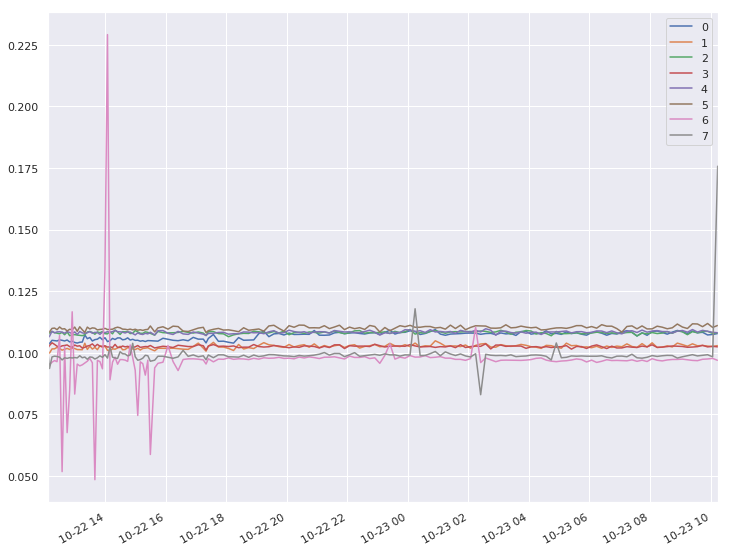

In [21]:
dataset_train1 = df['2003-10-22 12:06:24':'2003-10-23 23:52:39']
dataset_test1 = df['2003-10-23 23:52:39':]
dataset_train1.plot(figsize = (12,10));

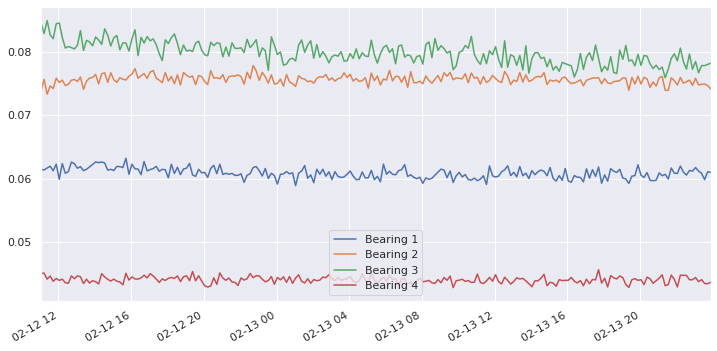

In [38]:
X_train = df['2004-02-12 11:02:39':'2004-02-13 23:52:39']
X_test = df['2004-02-13 23:52:39':]
X_train.plot(figsize = (12,6));


**Testing**

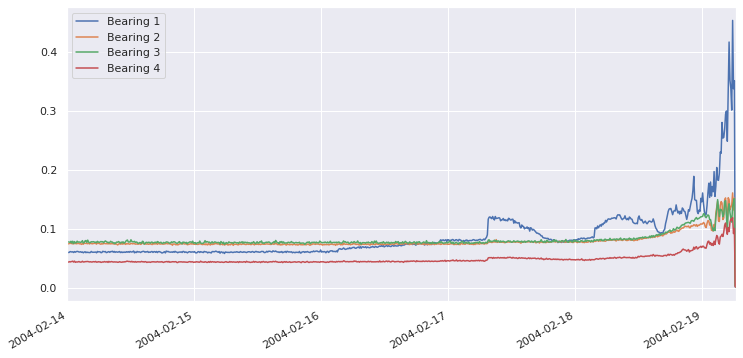

In [39]:
X_test.plot(figsize = (12,6));

# Preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns=X_train.columns, 
                              index=X_train.index)
# Random shuffle training data
# X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(X_test), 
                             columns=X_test.columns, 
                             index=X_test.index)
